In [1]:
import plotly.express as px

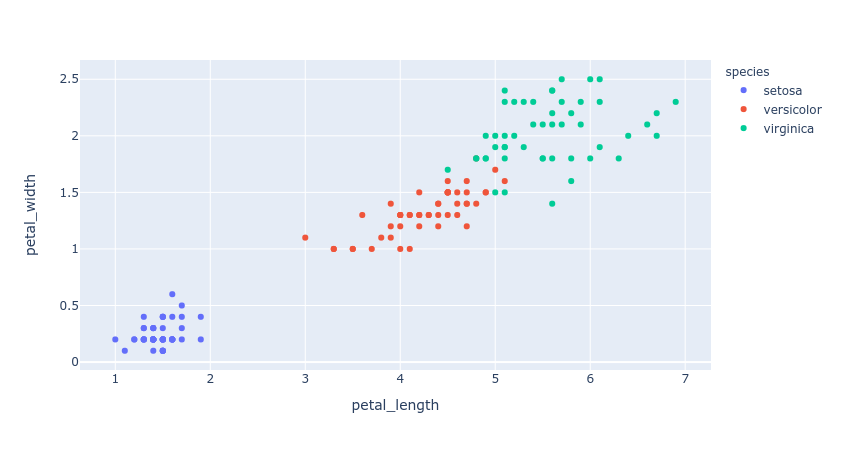

In [2]:
data = px.data.iris()
px.scatter(data, x='petal_length', y='petal_width', color='species')

In [3]:
from sklearn.cluster import KMeans

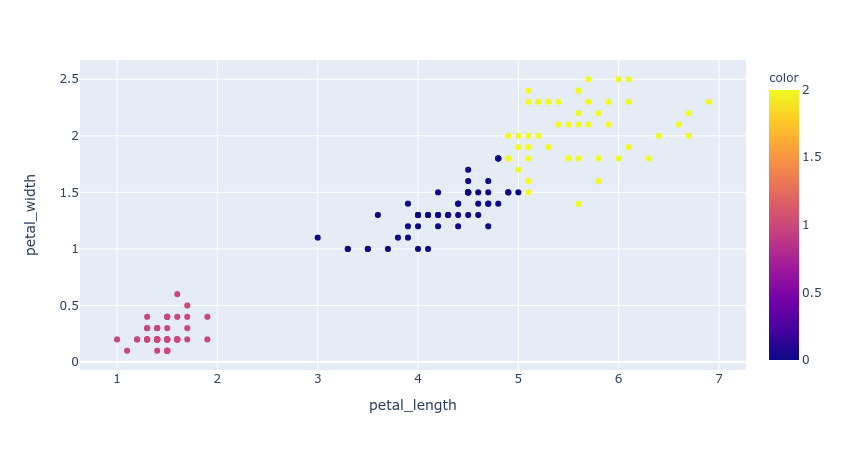

In [5]:
kmeans = KMeans(n_clusters=3).fit(data[["petal_width","petal_length"]])
px.scatter(data, x='petal_length', y='petal_width', color=kmeans.labels_)

In [6]:
kmeans.predict([[2,1], [0.5,1]])

array([1, 1], dtype=int32)

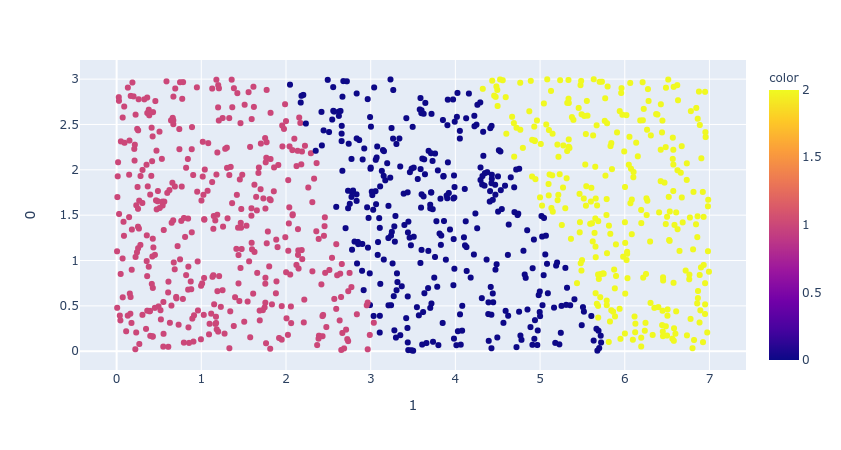

In [8]:
import numpy as np
test_data = np.vstack([np.random.uniform(low=0,high=3,size=1000),np.random.uniform(low=0,high=7,size=1000)]).T
labels = kmeans.predict(test_data)
px.scatter(test_data, x= 1, y = 0, color= labels)

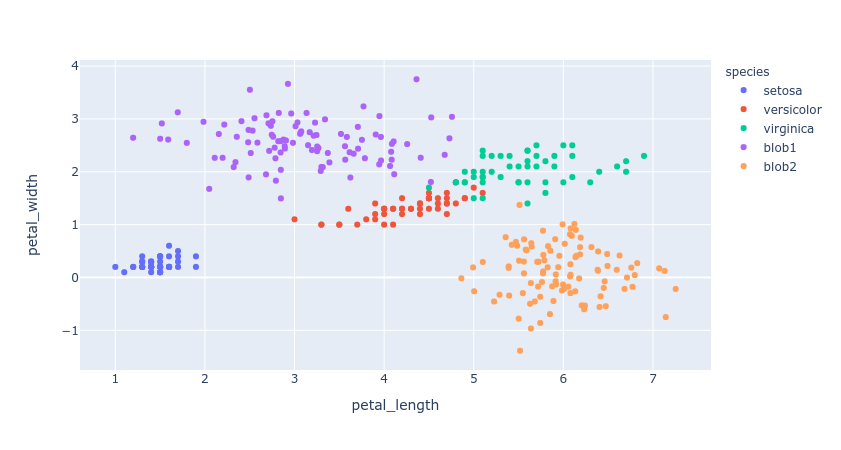

In [11]:
from pandas import DataFrame
blob_1 = np.random.normal(loc=(2.5,3), scale=(0.4,0.8), size=(100,2))
blob_2 = np.random.normal(loc=(0,6), scale=0.5, size=(100,2))
lblob_1 = np.hstack([blob_1, np.full((100,1),"blob1")])
lblob_2 = np.hstack([blob_2, np.full((100,1),"blob2")])
data = px.data.iris()
data = data.append(DataFrame(lblob_1, columns=["petal_width", "petal_length", "species"]))
data = data.append(DataFrame(lblob_2, columns=["petal_width", "petal_length", "species"]))
px.scatter(data, x='petal_length', y='petal_width', color='species')

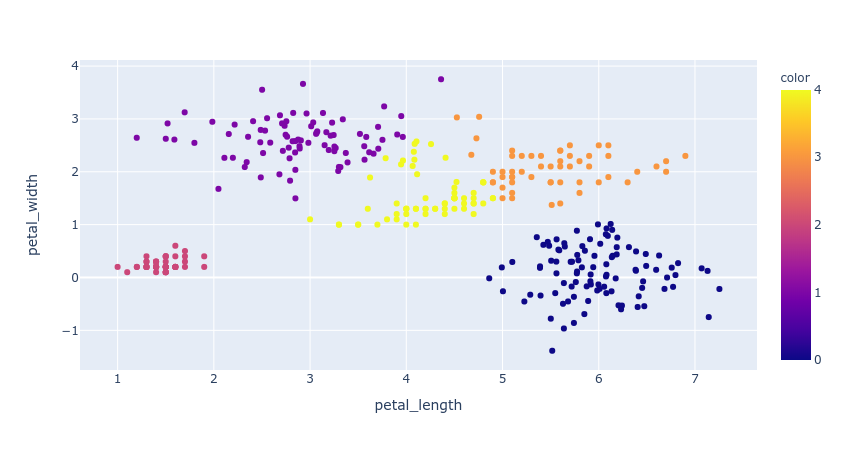

In [13]:
kmeans_2 = KMeans(n_clusters=5).fit(data[["petal_width","petal_length"]])
px.scatter(data, x='petal_length', y='petal_width', color=kmeans_2.labels_)

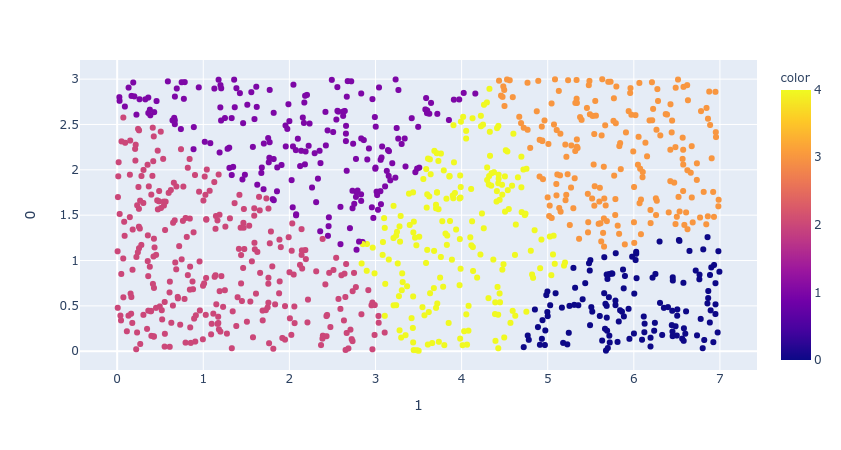

In [15]:
labels_2 = kmeans_2.predict(test_data)
px.scatter(test_data, x=1, y=0, color=labels_2)

In [23]:
from sklearn.svm import OneClassSVM
import plotly.graph_objects as go
import ipywidgets as w
from ipywidgets import interact
train_data = px.data.iris()[["petal_width", "petal_length"]]
test_data = np.stack(np.meshgrid(np.linspace(start=0, stop=3, num=100),np.linspace(start=0, stop=7, num=100)),axis=-1).reshape(-1,2)
@interact(nu=w.FloatSlider(min=0.01, max=0.99, step=0.01), gamma=w.FloatSlider(min=0.01, max=0.99, step=0.01))
def svm_interact(nu, gamma):
    clf = OneClassSVM(nu=nu, kernel='rbf', gamma=gamma).fit(train_data)
    # labels = clf.predict(test_data)
    labels = clf.decision_function(test_data)
    go.Figure([
        go.Contour(x=test_data[:,1], y=test_data[:,0], z=labels),
        go.Scatter(y=train_data["petal_width"], x=train_data["petal_length"], mode="markers")
    ]).show()

interactive(children=(FloatSlider(value=0.01, description='nu', max=0.99, min=0.01, step=0.01), FloatSlider(va…

In [27]:
from sklearn.neighbors import LocalOutlierFactor
@interact(n=w.IntSlider(min=1, max=100), c=w.FloatSlider(min=0.01,max=0.49, step=0.01))
def lof_interact(n,c):
    clf = LocalOutlierFactor(novelty=True, n_neighbors=n, contamination=c).fit(train_data)
    #px.scatter(train_data, x='petal_length', y='petal_width', color=clf.negative_outlier_factor_)
    labels = clf.predict(test_data)
    go.Figure([
        go.Contour(x=test_data[:,1], y=test_data[:,0], z=labels),
        go.Scatter(y=train_data["petal_width"], x=train_data["petal_length"], mode="markers")
    ]).show()

interactive(children=(IntSlider(value=1, description='n', min=1), FloatSlider(value=0.01, description='c', max…

In [30]:
def plot(*args, start=0):
    plts = []
    for it in args:
        data = np.array(list(enumerate(it,start=start)))
        plts.append(dict(x=data[:,0], y=data[:,1]))
    go.Figure(plts).show()

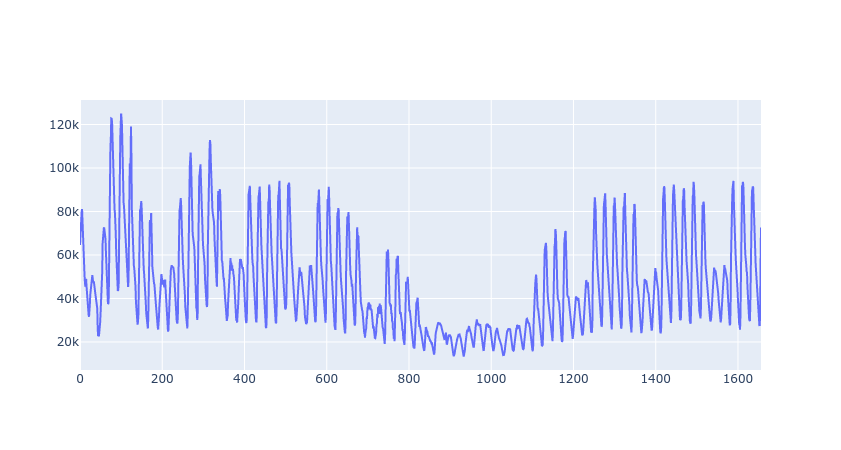

In [31]:
data = np.loadtxt('B1H.txt')
plot(data)

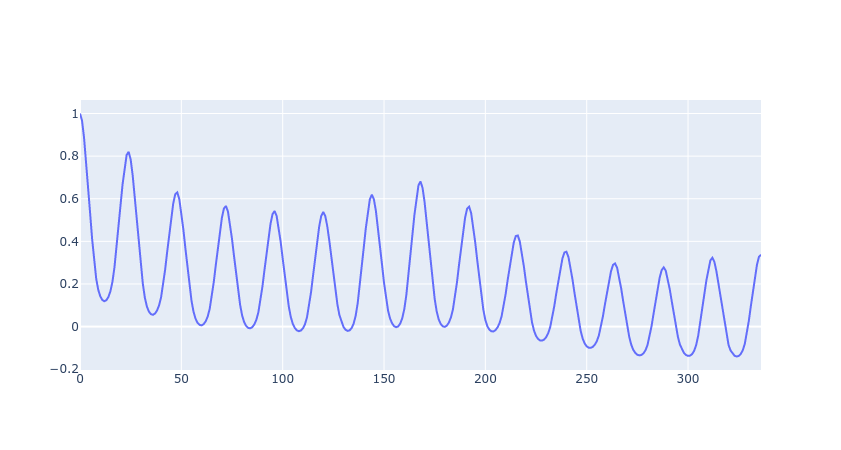

In [33]:
import statsmodels.tsa.stattools as st
plot(st.acf(data,fft=True,nlags=24*14))

In [35]:
points = np.split(data[21:-4], (len(data)-21-4)//24)
len(data)//24

69

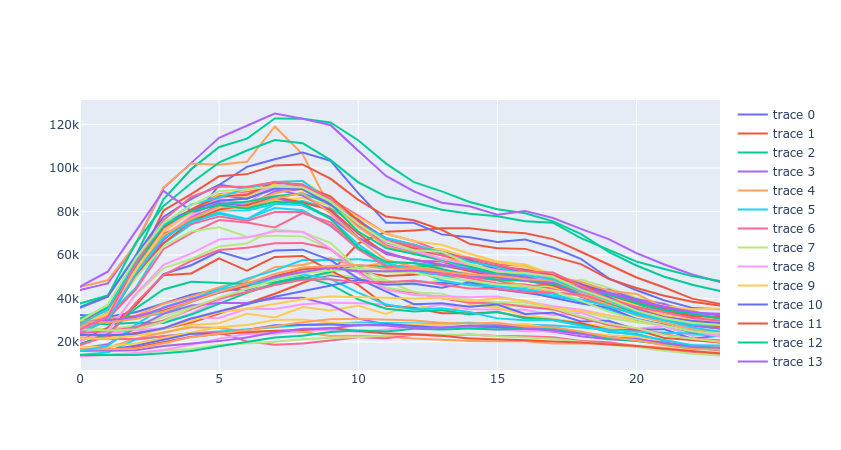

In [38]:
plot(*points)

In [39]:
kmeans = KMeans(n_clusters=2).fit(points[:30])
kmeans.labels_

array([1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1], dtype=int32)

In [40]:
kmeans.predict(points[30:])

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0], dtype=int32)

In [56]:
w_len = 24
windows = np.vstack([data[i:i+w_len] for i in range(len(data)-24)])
split_idx = 2*windows.shape[0]//3
training_data = windows[:split_idx]
test_data = windows[split_idx:]
clf = OneClassSVM(nu=0.01, kernel='sigmoid', gamma='scale').fit(training_data)
plot(data[:split_idx],1e5*(1-clf.predict(training_data)))

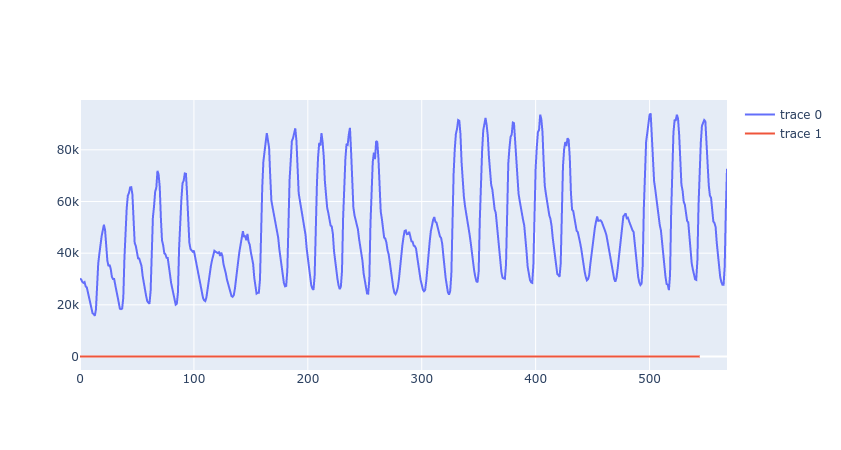

In [58]:
plot(data[split_idx:],1e5*(1-clf.predict(test_data)))

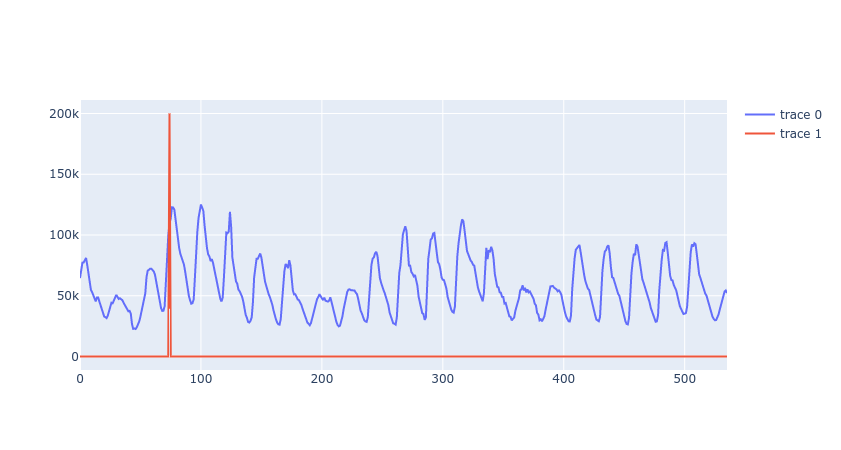

In [66]:
w_len = 48
windows = np.vstack([data[i:i+w_len] for i in range(len(data)-w_len)])
split_idx = windows.shape[0]//3
training_data = windows[:split_idx]
test_data = windows[split_idx:]
clf = LocalOutlierFactor(novelty=True, n_neighbors=24*7, contamination=1/len(training_data)).fit(training_data)
plot(data[:split_idx],1e5*(1-clf.predict(training_data)))

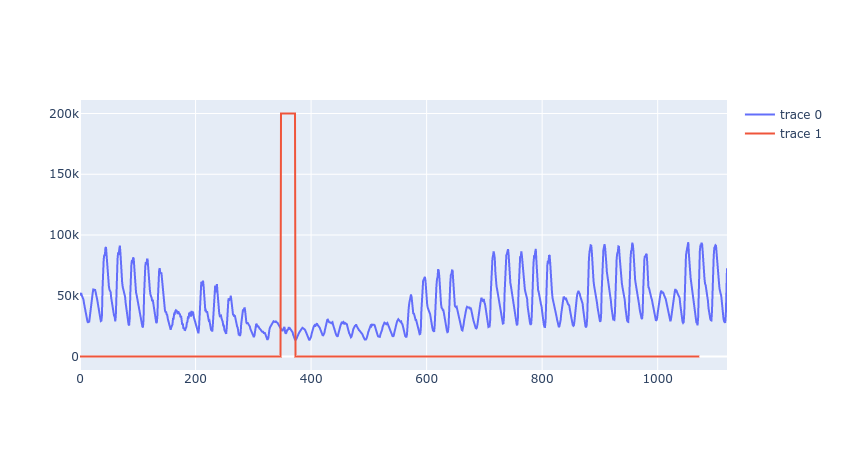

In [67]:
plot(data[split_idx:],1e5*(1-clf.predict(test_data)))

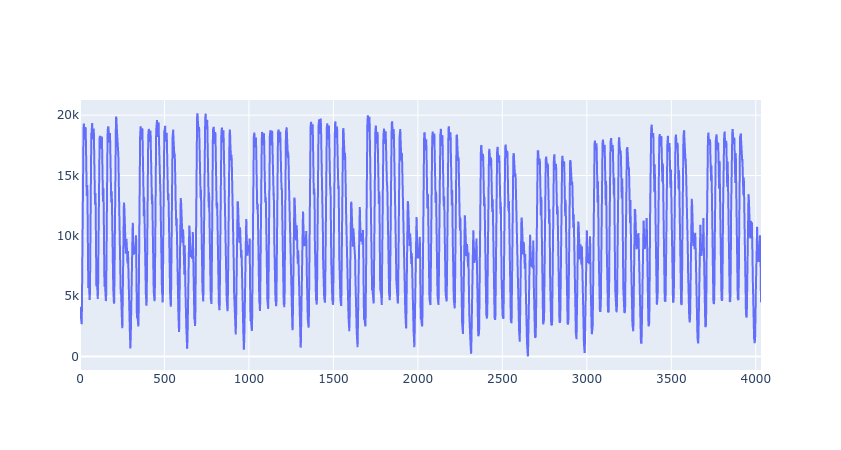

In [68]:
import pmdarima as pm
raw_data = pm.datasets.load_taylor()
data = raw_data - np.min(raw_data)
plot(data)

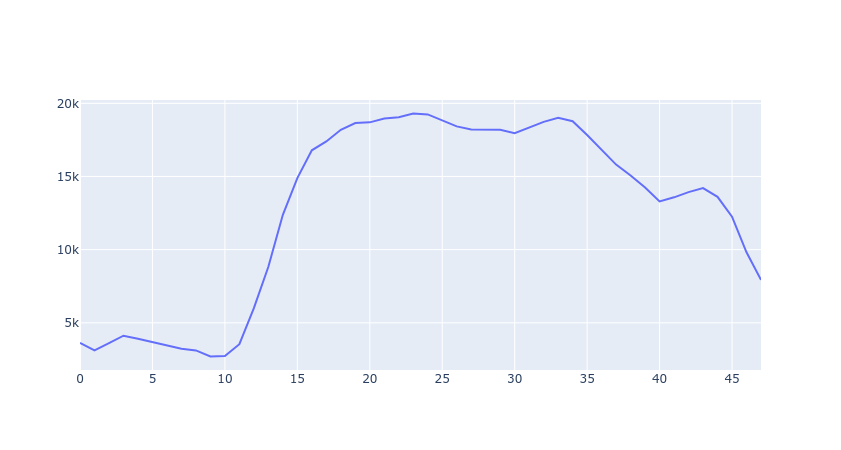

In [69]:
split_idx = 48
training_data = data[:split_idx]
test_data = data[split_idx+1:]
plot(training_data)

In [70]:
mdl = pm.auto_arima(training_data, suppress_warnings=True)

In [71]:
prediction = []
pred_len = 2
data_len = 48
nump = len(test_data)//data_len
td = training_data
for p in np.split(test_data[:nump*data_len], nump):
    mdl = pm.auto_arima(td, suppress_warnings=True)
    for t in np.split(p, data_len//pred_len):
        prediction += list(mdl.predict(pred_len))
        mdl.update(t)
    td = p

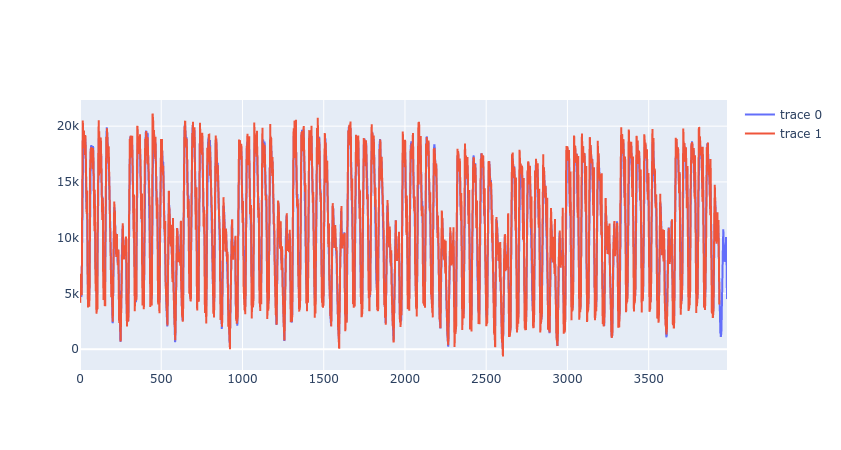

In [72]:
plot(test_data, prediction)

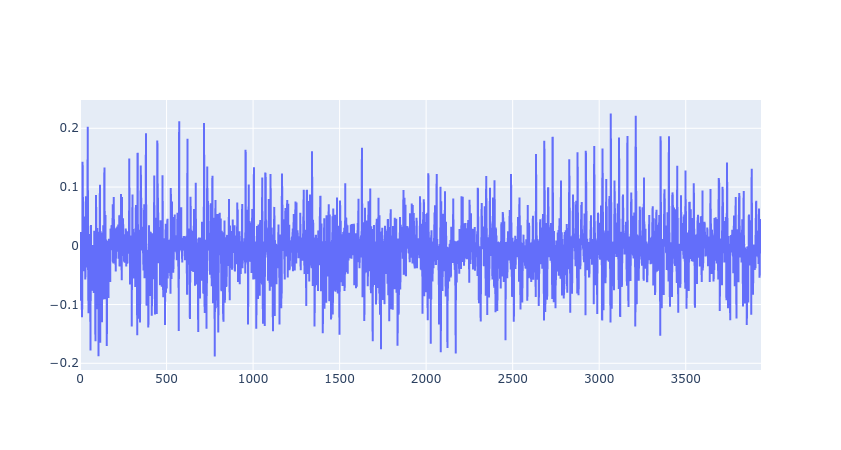

In [73]:
plot((np.array(prediction)-test_data[:len(prediction)])/np.max(test_data))